In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\admin\Downloads\Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.shape

(200, 5)

In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

<AxesSubplot:>

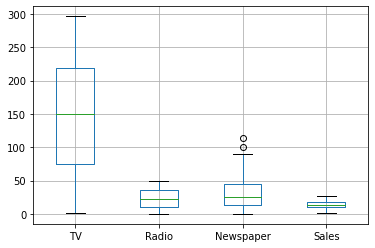

In [8]:
data.boxplot()

In [9]:
columns=['TV', 'Radio','Newspaper','Sales']

In [10]:
for col in columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3-q1
    min_Value = q1-1.5*IQR
    max_Value = q3+1.5*IQR

    outliers = []
    for i in data[col]:
        #print(i)
        if i< min_Value or i>max_Value:
            outliers.append(i)
    print(f"Outliers in {col}:",len(outliers))

Outliers in TV: 0
Outliers in Radio: 0
Outliers in Newspaper: 2
Outliers in Sales: 0


In [11]:
data_df= data.loc[(data[col] > min_Value) & (data[col] < max_Value)]
data.shape

(200, 4)

<AxesSubplot:>

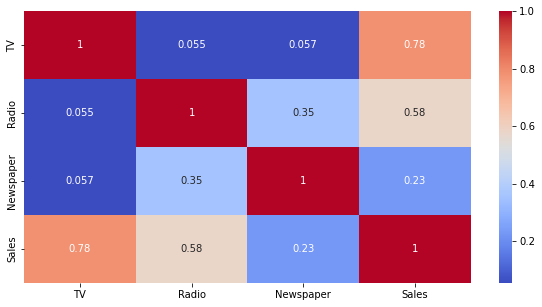

In [12]:
#heatmap for correlation
x=data.corr()
fig=plt.figure(figsize=(10,5))
sns.heatmap(x,cmap="coolwarm",annot=True)

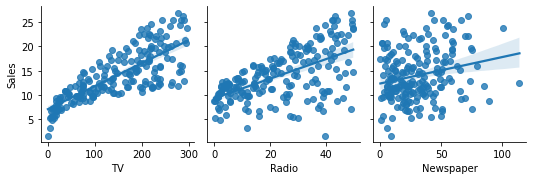

In [13]:
sns.pairplot(data,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="pastel")
plt.show()

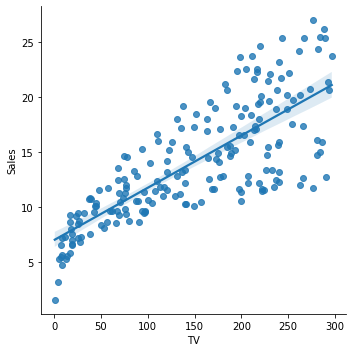

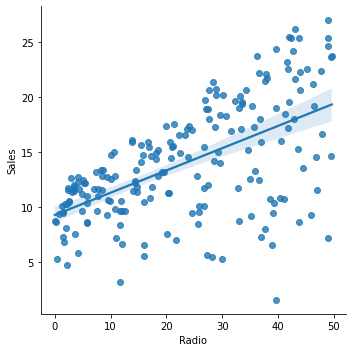

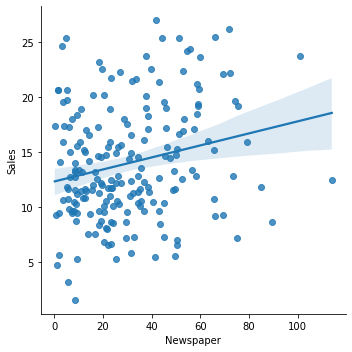

In [14]:
sns.lmplot(x='TV', y='Sales', data=data)
sns.lmplot(x='Radio', y='Sales', data=data)
sns.lmplot(x='Newspaper',y= 'Sales', data=data)


# Model building

In [15]:
x=data.drop(['Sales'],axis=1)

In [16]:
x.head(5)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
y=data['Sales']

In [18]:
y.head(5)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [21]:
# Linear Regression Model
import statsmodels.formula.api as sm

lr_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=data).fit()

In [22]:
# Print the coefficients of the linear regression model
print(lr_model.params, "\n")

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 



THE LIEAR REGRESSION EQUATION IS : Y=2.93888+(0.045765*TV)+(0.188530*Radio)-(0.001037*Newspaper)

In [23]:
# Print the summary of the linear regression model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        23:53:25   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Interpretation:There is 89% variation explained by independent variable
and Newspaper is more significant variable than others.

In [24]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train,y_train)

MinMaxScaler()

In [25]:
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [26]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
]

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print("")
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))
    
    


Linear Regression
Mean Squared Error: 1.7332927815807757
R2 Score: 0.9184369032278495
Cross-Validation R2: 0.8717418681341066

Ridge Regression
Mean Squared Error: 1.951122964122947
R2 Score: 0.9081865263455442
Cross-Validation R2: 0.8680637344946384


In [28]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

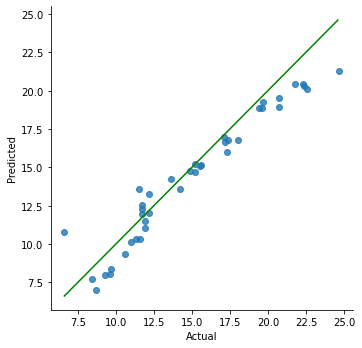

In [29]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()


# prediction using test data

In [30]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
TV= float(input("Enter the TV value: "))
Radio = float(input("Enter the Radio value: "))
Newspaper= float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [TV],
    "Radio": [Radio],
    "Newspaper": [Newspaper]
})

print("-------------------------------------")
new_pred = lr.predict(new_data)
print("Predicted Sales : {}".format(abs(new_pred)))

Enter the TV value: 44.5
Enter the Radio value: 39.3
Enter the Newspaper value: 45.1
-------------------------------------
Predicted Sales : [12.24450713]


# THANK YOU